<a href="https://colab.research.google.com/github/jsm-UOC/tensorflowCourse/blob/main/IntroductionNLPCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in TF

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-9b0bdb51-b10d-0e72-3932-1feb7c0ec061)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-05-24 14:44:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-24 14:44:32 (86.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-05-24 14:44:38--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   731KB/s    in 0.8s    

2023-05-24 14:44:40 (731 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
import random
random_index = random.randint(0, len(train_df)-5)

for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)"if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
White people I know you worry tirelessly about black on black crime but what are you going to do about your mass murderer problem?

---

Target: 1 (real disaster)
Text:
Body shops inundated with cars dented by hail... Good news insurance pays... Bad news :  you are stuck with deductible !
#wcvb

---

Target: 0 (not real disaster)
Text:
Err:509

---

Target: 0 (not real disaster)
Text:
How do people bake without turning their kitchen into a war zone of eggs and flour

---

Target: 1 (real disaster)
Text:
@KlaraJoelsson Well I have seen it now! That's a bummer. We've had this heat wave tho... 43'c!! I'd prefer the rain... :P

---



### Split data into training and validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None)

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
max_vocab_length =10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 Conning Builds Strong Case for Portfolio #Diversification for Property-Casualty Insurers http://t.co/33FbR25t1O        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1, 6054, 1356,  823,   10, 9676,    1,   10, 3511, 2926,    1,
           0,    0,    0,    0]])>

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

len(words_in_vocab), top_5_words, bottom_5_words

(10000,
 ['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'])

### Creating an Embedding

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)
embedding

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nEmbedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 China's Stock Market Crash: Are There Gems In The Rubble?: ChinaÛªs stock market crash this su... http://t.co/KABK3tcJNL ...  via @Forbes      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 4.3982986e-02, -2.1694994e-02, -2.9543448e-02, ...,
         -3.4137763e-02, -1.7117642e-02, -4.9793936e-02],
        [ 3.8522258e-03,  8.1907958e-05, -1.4637925e-02, ...,
          1.3708901e-02, -4.8957895e-02,  3.6312230e-03],
        [-9.7104199e-03, -3.2756209e-02,  3.0700192e-03, ...,
         -4.2167418e-03,  3.5893191e-02,  2.6293006e-02],
        ...,
        [-9.7104199e-03, -3.2756209e-02,  3.0700192e-03, ...,
         -4.2167418e-03,  3.5893191e-02,  2.6293006e-02],
        [ 2.9353712e-02, -2.9306794e-02,  8.2887784e-03, ...,
         -5.1753595e-04, -1.5195321e-02, -4.0525805e-02],
        [-3.2669246e-02,  1.4241520e-02, -9.0053566e-03, ...,
         -4.7233690e-02,  3.5406593e-02, -8.9781359e-04]]], dtype=float32)>

In [ ]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.04398299, -0.02169499, -0.02954345,  0.0088908 ,  0.01846773,
        0.04905714, -0.01986508, -0.00293112, -0.02841321, -0.0035563 ,
        0.00011026,  0.00214746,  0.04766459,  0.0297623 , -0.03829666,
        0.04875436, -0.00244678, -0.03058832, -0.03276103,  0.00248809,
        0.01418283, -0.03243933, -0.02969348, -0.04451125,  0.02161652,
        0.03887046,  0.00526864, -0.01622312,  0.00750872,  0.02693336,
       -0.02410201,  0.0219943 , -0.04794785,  0.04572934, -0.00864862,
        0.00188094, -0.0488964 ,  0.02186489, -0.02384405,  0.02784259,
       -0.0333661 , -0.00833417,  0.01513508,  0.01079466,  0.02315379,
       -0.02841672,  0.04239922, -0.02329353, -0.03999351,  0.00088211,
       -0.01412706, -0.00889724,  0.02056228, -0.00493478, -0.04816319,
        0.0430292 , -0.0080853 , -0.02051151,  0.04536753, -0.00046686,
        0.0454713 ,  0.04842785, -0.01546265,  0.00052478, -0.0452609 ,
        0.012295

## Modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluating function

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculate accuracy, precision, recall and F1-score for binary classification
  """
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}

  return model_results

In [ ]:
baseline_results = calculate_results(y_true=val_labels,
                                      y_pred=baseline_preds)
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 1: Feed-forward NN

In [ ]:
from helper_functions import create_tensorboard_callback


SAVE_DIR = "model_logs"

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs, name="mode_1_dense")

In [ ]:
model_1.summary()

Model: "mode_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
No

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230524-144447
Epoch 1/5
215/215 [==============================] - 30s 94ms/step - loss: 0.6130 - accuracy: 0.6871 - val_loss: 0.5361 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4421 - accuracy: 0.8183 - val_loss: 0.4718 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3478 - accuracy: 0.8581 - val_loss: 0.4620 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2860 - accuracy: 0.8907 - val_loss: 0.4613 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2389 - accuracy: 0.9111 - val_loss: 0.4799 - val_accuracy: 0.7913


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7913


[0.4799192249774933, 0.7913385629653931]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [ ]:
model_1_pred_probs[:10]

array([[0.35506445],
       [0.77083486],
       [0.9978187 ],
       [0.1011024 ],
       [0.11941145],
       [0.93425685],
       [0.9181222 ],
       [0.9924919 ],
       [0.9602286 ],
       [0.24621679]], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_1_results = calculate_results(y_true=val_labels,
                                      y_pred=model_1_preds)
model_1_results

{'accuracy': 0.7913385826771654,
 'precision': 0.7981058819260496,
 'recall': 0.7913385826771654,
 'f1': 0.7878826519522748}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False,  True])

## Visualize learned embeddings

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "mode_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
No

In [ ]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights, embed_weights.shape

(array([[-0.05881302, -0.00235013, -0.01891956, ...,  0.03390163,
          0.01166891, -0.05867594],
        [-0.00175113,  0.0140617 , -0.04694694, ...,  0.02802825,
         -0.01531393, -0.02454597],
        [-0.01265193,  0.03427505, -0.01867232, ...,  0.05233277,
          0.04545017,  0.00745353],
        ...,
        [ 0.04384022,  0.04000754, -0.01724441, ..., -0.01580847,
         -0.01045834,  0.00669872],
        [ 0.01036364,  0.04514859, -0.04975727, ...,  0.01099891,
         -0.00630363, -0.04254452],
        [-0.05035528,  0.02237071, -0.08047772, ...,  0.10721263,
          0.10760522, -0.05397078]], dtype=float32),
 (10000, 128))

In [ ]:
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Network

### Model 2: Long Short Term Memory (LSTM)

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(units=64, return_sequences=True)(x)
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230524-144532
Epoch 1/5
215/215 [==============================] - 16s 59ms/step - loss: 0.2242 - accuracy: 0.9142 - val_loss: 0.6045 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1592 - accuracy: 0.9415 - val_loss: 0.5548 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1280 - accuracy: 0.9517 - val_loss: 0.6717 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1045 - accuracy: 0.9607 - val_loss: 0.7558 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0837 - accuracy: 0.9658 - val_loss: 0.9047 - val_accuracy: 0.7730


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.00865046],
       [0.93273467],
       [0.999796  ],
       [0.12105457],
       [0.00106714],
       [0.9994137 ],
       [0.9168954 ],
       [0.9998845 ],
       [0.9997873 ],
       [0.8119655 ]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)

In [ ]:
model_2_results

{'accuracy': 0.7729658792650919,
 'precision': 0.7731790030340066,
 'recall': 0.7729658792650919,
 'f1': 0.7717707641179984}

In [ ]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: Gated Recurrent Unit (GRU)

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230524-144601
Epoch 1/5
215/215 [==============================] - 17s 66ms/step - loss: 0.1620 - accuracy: 0.9380 - val_loss: 0.7135 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0825 - accuracy: 0.9711 - val_loss: 0.8818 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0699 - accuracy: 0.9723 - val_loss: 0.8460 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0594 - accuracy: 0.9752 - val_loss: 1.0025 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0570 - accuracy: 0.9766 - val_loss: 1.3013 - val_accuracy: 0.7782


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[2.4425445e-04],
       [8.4671140e-01],
       [9.9982882e-01],
       [6.5413661e-02],
       [1.0670904e-04],
       [9.9976534e-01],
       [9.6855026e-01],
       [9.9993181e-01],
       [9.9987555e-01],
       [9.7079945e-01]], dtype=float32)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)

In [ ]:
model_3_results

{'accuracy': 0.7782152230971129,
 'precision': 0.7801652612118941,
 'recall': 0.7782152230971129,
 'f1': 0.7761410008648767}

### Model 4: Bidirectional RNN

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230524-144644
Epoch 1/5
215/215 [==============================] - 17s 62ms/step - loss: 0.1051 - accuracy: 0.9705 - val_loss: 1.0450 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0526 - accuracy: 0.9785 - val_loss: 1.2528 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0450 - accuracy: 0.9803 - val_loss: 1.3059 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0414 - accuracy: 0.9820 - val_loss: 1.5226 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0418 - accuracy: 0.9799 - val_loss: 1.6196 - val_accuracy: 0.7690


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[1.3244689e-04],
       [6.4363551e-01],
       [9.9997437e-01],
       [2.1277861e-01],
       [1.0283451e-05],
       [9.9978083e-01],
       [9.5438653e-01],
       [9.9998820e-01],
       [9.9996889e-01],
       [9.9798030e-01]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)

In [ ]:
model_4_results

{'accuracy': 0.7690288713910761,
 'precision': 0.7714293151588276,
 'recall': 0.7690288713910761,
 'f1': 0.7665280970313494}

## Convolutional NN for text

### Model 5: Conv1D

In [ ]:
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))

conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        activation="relu",
                        padding="valid")

conv_1d_output = conv_1d(embedding_test)

max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  strides=1,
                  activation="relu",
                  padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

In [ ]:
model_5.summary()

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_5_Conv1D")])

215/215 [==============================] - 14s 52ms/step - loss: 0.1265 - accuracy: 0.9597 - val_loss: 0.9084 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0776 - accuracy: 0.9721 - val_loss: 1.0573 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0629 - accuracy: 0.9753 - val_loss: 1.1117 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0553 - accuracy: 0.9784 - val_loss: 1.1719 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 2s 12ms/step - loss: 0.0528 - accuracy: 0.9771 - val_loss: 1.1617 - val_accuracy: 0.7664


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.0231953e-01],
       [7.4337149e-01],
       [9.9993968e-01],
       [4.5788430e-02],
       [7.0331959e-07],
       [9.9890876e-01],
       [9.5966607e-01],
       [9.9996662e-01],
       [9.9999881e-01],
       [8.9744961e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)

In [ ]:
model_5_results

{'accuracy': 0.7664041994750657,
 'precision': 0.7667302683900181,
 'recall': 0.7664041994750657,
 'f1': 0.7650123935123555}

In [ ]:
baseline_results, model_1_results, model_2_results, model_3_results, model_4_results, model_5_results

({'accuracy': 0.7926509186351706,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706,
  'f1': 0.7862189758049549},
 {'accuracy': 0.7913385826771654,
  'precision': 0.7981058819260496,
  'recall': 0.7913385826771654,
  'f1': 0.7878826519522748},
 {'accuracy': 0.7729658792650919,
  'precision': 0.7731790030340066,
  'recall': 0.7729658792650919,
  'f1': 0.7717707641179984},
 {'accuracy': 0.7782152230971129,
  'precision': 0.7801652612118941,
  'recall': 0.7782152230971129,
  'f1': 0.7761410008648767},
 {'accuracy': 0.7690288713910761,
  'precision': 0.7714293151588276,
  'recall': 0.7690288713910761,
  'f1': 0.7665280970313494},
 {'accuracy': 0.7664041994750657,
  'precision': 0.7667302683900181,
  'recall': 0.7664041994750657,
  'f1': 0.7650123935123555})

## Model 6: Pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
sample_sentence

"There's a flood in my street!"

In [ ]:
embed_samples = embed([sample_sentence, "When you can the"])
embed_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157028,  0.0248591 ,  0.02878048, ..., -0.00186124,
         0.02315826, -0.01485021],
       [ 0.0264816 , -0.00970308,  0.00189431, ..., -0.04420933,
         0.0721135 , -0.05912797]], dtype=float32)>

In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype="string",
                                        trainable=False,
                                        name="USE")

In [ ]:
from tensorflow.keras import layers

model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_6_pretrained_encoder")])

Saving TensorBoard log files to: model_logs/model_6_pretrained_encoder/20230524-144901
Epoch 1/5
215/215 [==============================] - 8s 23ms/step - loss: 0.6478 - accuracy: 0.7332 - val_loss: 0.6130 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.5804 - accuracy: 0.7902 - val_loss: 0.5638 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.5377 - accuracy: 0.7936 - val_loss: 0.5321 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 6s 26ms/step - loss: 0.5093 - accuracy: 0.7987 - val_loss: 0.5111 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4893 - accuracy: 0.8012 - val_loss: 0.4967 - val_accuracy: 0.7900


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.36715528],
       [0.67513967],
       [0.84813964],
       [0.34809867],
       [0.6536348 ],
       [0.73853767],
       [0.8260401 ],
       [0.83416   ],
       [0.75712967],
       [0.20659946]], dtype=float32)

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)

In [ ]:
model_6_results

{'accuracy': 0.7900262467191601,
 'precision': 0.7904026816892662,
 'recall': 0.7900262467191601,
 'f1': 0.788967977944356}

In [ ]:
baseline_results, model_1_results, model_2_results, model_3_results, model_4_results, model_5_results, model_6_results

({'accuracy': 0.7926509186351706,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706,
  'f1': 0.7862189758049549},
 {'accuracy': 0.7913385826771654,
  'precision': 0.7981058819260496,
  'recall': 0.7913385826771654,
  'f1': 0.7878826519522748},
 {'accuracy': 0.7729658792650919,
  'precision': 0.7731790030340066,
  'recall': 0.7729658792650919,
  'f1': 0.7717707641179984},
 {'accuracy': 0.7782152230971129,
  'precision': 0.7801652612118941,
  'recall': 0.7782152230971129,
  'f1': 0.7761410008648767},
 {'accuracy': 0.7690288713910761,
  'precision': 0.7714293151588276,
  'recall': 0.7690288713910761,
  'f1': 0.7665280970313494},
 {'accuracy': 0.7664041994750657,
  'precision': 0.7667302683900181,
  'recall': 0.7664041994750657,
  'f1': 0.7650123935123555},
 {'accuracy': 0.7900262467191601,
  'precision': 0.7904026816892662,
  'recall': 0.7900262467191601,
  'f1': 0.788967977944356})

In [ ]:
from tensorflow.keras import layers

model_6_5 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_5_USE")

In [ ]:
model_6_5.summary()

Model: "model_6_5_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
model_6_5_history = model_6_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_6_5_pretrained_encoder")])

Saving TensorBoard log files to: model_logs/model_6_5_pretrained_encoder/20230524-144946
Epoch 1/5
215/215 [==============================] - 5s 15ms/step - loss: 0.5037 - accuracy: 0.7818 - val_loss: 0.4515 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4137 - accuracy: 0.8142 - val_loss: 0.4421 - val_accuracy: 0.8136
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4010 - accuracy: 0.8254 - val_loss: 0.4309 - val_accuracy: 0.8176
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3926 - accuracy: 0.8262 - val_loss: 0.4310 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3870 - accuracy: 0.8297 - val_loss: 0.4284 - val_accuracy: 0.8176


In [ ]:
model_6_5_pred_probs = model_6_5.predict(val_sentences)
model_6_5_pred_probs[:10]

24/24 [==============================] - 1s 17ms/step


array([[0.16778043],
       [0.71324897],
       [0.982961  ],
       [0.22312814],
       [0.73846316],
       [0.714498  ],
       [0.9802848 ],
       [0.97644436],
       [0.9383366 ],
       [0.11526672]], dtype=float32)

In [ ]:
model_6_5_preds = tf.squeeze(tf.round(model_6_5_pred_probs))
model_6_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_5_preds)

In [ ]:
model_6_5_results

{'accuracy': 0.8175853018372703,
 'precision': 0.8186307248506688,
 'recall': 0.8175853018372703,
 'f1': 0.8165413215854364}

In [ ]:
baseline_results, model_1_results, model_2_results, model_3_results, model_4_results, model_5_results, model_6_results, model_6_5_results

({'accuracy': 0.7926509186351706,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706,
  'f1': 0.7862189758049549},
 {'accuracy': 0.7913385826771654,
  'precision': 0.7981058819260496,
  'recall': 0.7913385826771654,
  'f1': 0.7878826519522748},
 {'accuracy': 0.7729658792650919,
  'precision': 0.7731790030340066,
  'recall': 0.7729658792650919,
  'f1': 0.7717707641179984},
 {'accuracy': 0.7782152230971129,
  'precision': 0.7801652612118941,
  'recall': 0.7782152230971129,
  'f1': 0.7761410008648767},
 {'accuracy': 0.7690288713910761,
  'precision': 0.7714293151588276,
  'recall': 0.7690288713910761,
  'f1': 0.7665280970313494},
 {'accuracy': 0.7664041994750657,
  'precision': 0.7667302683900181,
  'recall': 0.7664041994750657,
  'f1': 0.7650123935123555},
 {'accuracy': 0.7900262467191601,
  'precision': 0.7904026816892662,
  'recall': 0.7900262467191601,
  'f1': 0.788967977944356},
 {'accuracy': 0.8175853018372703,
  'precision': 0.8186307248506688,
  'recall': 0.81758530

## Model 7: Train with 10% of the data

In [ ]:
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [ ]:
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
train_10_percent_split = int(0.1*len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_sentences_10_percent), len(train_labels_10_percent)

(685, 685)

In [ ]:
import numpy as np
np.unique(train_labels_10_percent, return_counts=True)

(array([0, 1]), array([406, 279]))

In [ ]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

model_7._name = "model_7_10_percent"
model_7.summary()

Model: "model_7_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_7_10_percent")])

Saving TensorBoard log files to: model_logs/model_7_10_percent/20230524-152159
Epoch 1/5
22/22 [==============================] - 4s 48ms/step - loss: 0.6826 - accuracy: 0.6380 - val_loss: 0.6761 - val_accuracy: 0.6942
Epoch 2/5
22/22 [==============================] - 1s 29ms/step - loss: 0.6698 - accuracy: 0.7387 - val_loss: 0.6671 - val_accuracy: 0.7388
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.6580 - accuracy: 0.7708 - val_loss: 0.6585 - val_accuracy: 0.7480
Epoch 4/5
22/22 [==============================] - 1s 24ms/step - loss: 0.6469 - accuracy: 0.7825 - val_loss: 0.6506 - val_accuracy: 0.7585
Epoch 5/5
22/22 [==============================] - 1s 28ms/step - loss: 0.6364 - accuracy: 0.7956 - val_loss: 0.6431 - val_accuracy: 0.7638


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.45583904],
       [0.53097516],
       [0.58157915],
       [0.465982  ],
       [0.4933536 ],
       [0.53416085],
       [0.54644   ],
       [0.5272521 ],
       [0.5287324 ],
       [0.40969443]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 0.7637795275590551,
 'precision': 0.779135644771573,
 'recall': 0.7637795275590551,
 'f1': 0.7564519977524804}

In [ ]:
model_6_results

{'accuracy': 0.7900262467191601,
 'precision': 0.7904026816892662,
 'recall': 0.7900262467191601,
 'f1': 0.788967977944356}

## Comparing the performance

In [ ]:
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_use_encoder": model_6_results,
                                  "6_5_use_encode_dense": model_6_5_results,
                                  "7_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()

In [ ]:
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.791339,0.798106,0.791339,0.787883
2_lstm,0.772966,0.773179,0.772966,0.771771
3_gru,0.778215,0.780165,0.778215,0.776141
4_bidirectional,0.769029,0.771429,0.769029,0.766528
5_conv1d,0.766404,0.766730,0.766404,0.765012
6_use_encoder,0.790026,0.790403,0.790026,0.788968
6_5_use_encode_dense,0.817585,0.818631,0.817585,0.816541
7_use_encoder_10_percent,0.763780,0.779136,0.763780,0.756452


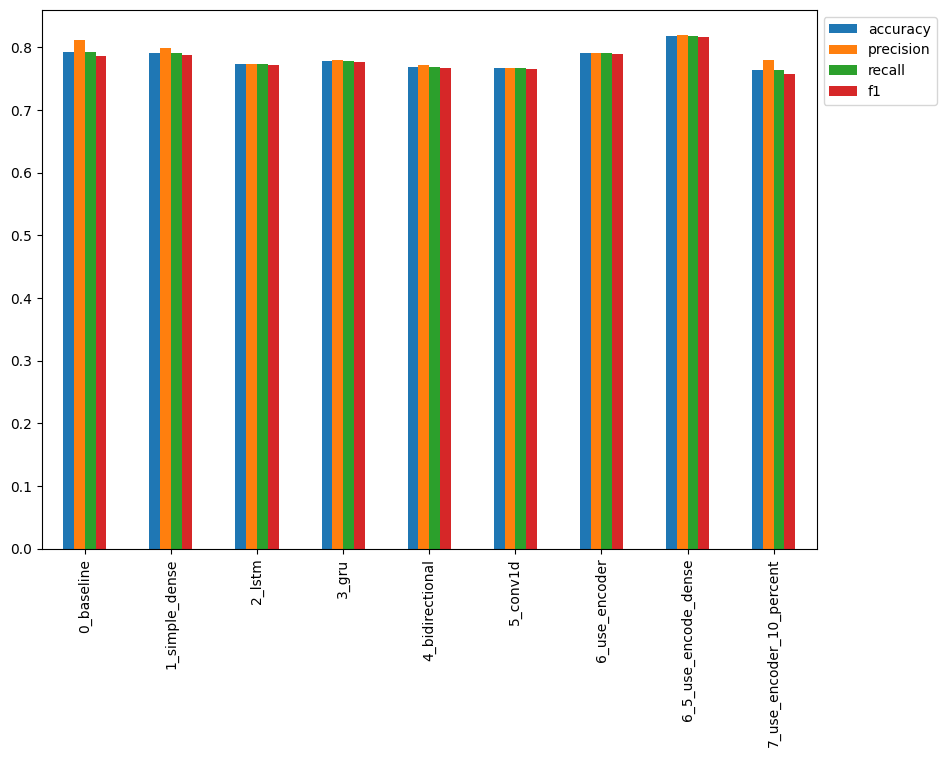

In [ ]:
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

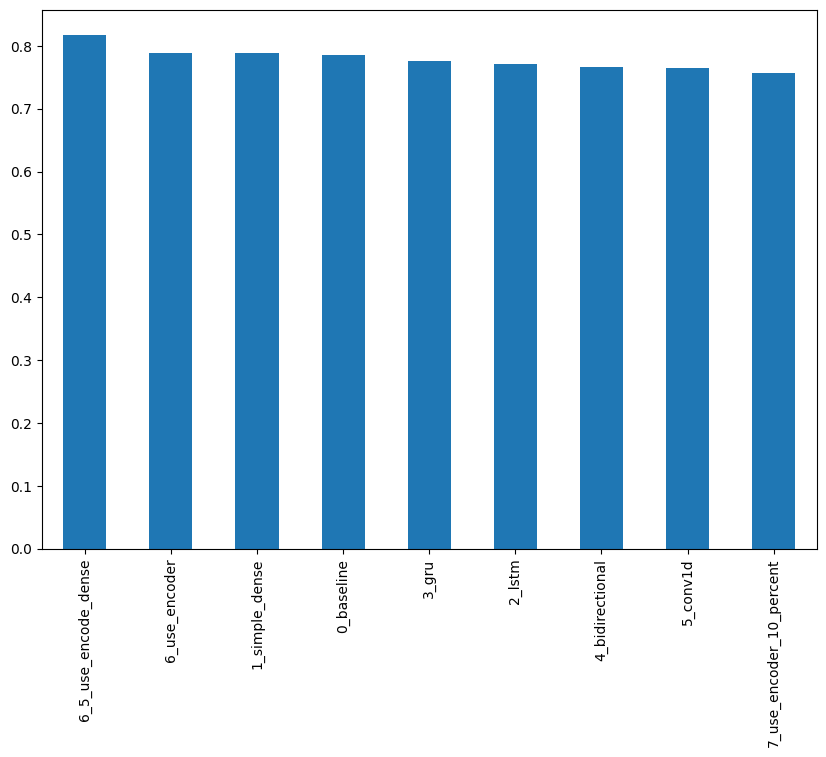

In [ ]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7))

In [ ]:
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modelling Experiments"\
  --description "Comparing multiple architectures on the Kaggle dataser"\
  --one_shot

2023-05-24 15:48:27.155879: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/CjYMJgygSdesen4k5fz9Yg/

[2023-05-24T15:48:29] Started scanning logdir.
[2023-05-24T15:48:40] Total uploaded: 240 scalars, 0 tensors, 8 binary objects (3.7 MB)
[2023-05-24T15:48:40] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/CjYMJgygSdesen4k5fz9Yg/


## Saving and loading a trained model

In [ ]:
model_6_5.save("model_6_5.h5")

In [ ]:
import tensorflow_hub as hub
loaded_model_6_5 = tf.keras.models.load_model("model_6_5.h5",
                                              custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
loaded_model_6_5.evaluate(val_sentences, val_labels)

24/24 [==============================] - 3s 30ms/step - loss: 0.4284 - accuracy: 0.8176


[0.42838814854621887, 0.817585289478302]

In [ ]:
model_6_5_results

{'accuracy': 0.8175853018372703,
 'precision': 0.8186307248506688,
 'recall': 0.8175853018372703,
 'f1': 0.8165413215854364}

In [ ]:
model_6_5.save("model_6_5_SaveModel_format")

In [ ]:
loaded_model_6_5_SaveModel_format = tf.keras.models.load_model("model_6_5_SaveModel_format")

In [ ]:
loaded_model_6_5_SaveModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.4284 - accuracy: 0.8176


[0.42838817834854126, 0.817585289478302]

## Finding the most wrong examples

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_5_preds,
                       "pred_prob": tf.squeeze(model_6_5_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.167780
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.713249
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.982961
3,@camilacabello97 Internally and externally scr...,1,0.0,0.223128
4,Radiation emergency #preparedness starts with ...,1,1.0,0.738463


In [ ]:
wrong_preds = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
wrong_preds["diff_prob"] = (wrong_preds["pred_prob"]-wrong_preds["target"]).abs()
most_wrong = wrong_preds.sort_values("diff_prob", ascending=False)

<ipython-input-158-b1923757dea6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_preds["diff_prob"] = (wrong_preds["pred_prob"]-wrong_preds["target"]).abs()


In [ ]:
wrong_preds = wrong_preds.sort_values("pred_prob", ascending=False)

In [ ]:
wrong_preds

,text,target,pred,pred_prob,diff_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.906070,0.906070
628,@noah_anyname That's where the concentration c...,0,1.0,0.858100,0.858100
759,FedEx will no longer transport bioterror patho...,0,1.0,0.857189,0.857189
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.840335,0.840335
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.833946,0.833946
...,...,...,...,...,...
233,I get to smoke my shit in peace,1,0.0,0.055190,0.944810
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.052965,0.947035
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.040697,0.959303
38,Why are you deluged with low self-image? Take ...,1,0.0,0.035955,0.964045


In [ ]:
for row in wrong_preds[:10].itertuples():
  _, text, target, pred, pred_prob, _ = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9060701131820679
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8581003546714783
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8571887016296387
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8403352499008179
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8339464664459229
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob: 0.8219072222709656
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Pr

In [ ]:
for row in wrong_preds[:-10].itertuples():
  _, text, target, pred, pred_prob, _ = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9060701131820679
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8581003546714783
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8571887016296387
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8403352499008179
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8339464664459229
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob: 0.8219072222709656
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Pr

## Making predictions on the test dataset

In [ ]:

# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_5.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 65ms/step
Pred: 1, Prob: 0.9644157886505127
Text:
100s of migrants feared drowned after 700 squeeze onto boat in Mediterranean.  http://t.co/lsyPtk18se

----

1/1 [==============================] - 0s 41ms/step
Pred: 0, Prob: 0.07218965888023376
Text:
I'm literally devastated right now??

----

1/1 [==============================] - 0s 47ms/step
Pred: 1, Prob: 0.634071946144104
Text:
New US counter #terrorism program urges #Muslims to rat each other out critics say http://t.co/mVn6T9VhUl http://t.co/7lUfjX684i

----

1/1 [==============================] - 0s 40ms/step
Pred: 0, Prob: 0.0755748450756073
Text:
Photo: 22 year old Yahoo Boy in Trouble for Attempting to Bribe EFCC Operatives
see... http://t.co/ObcHpSMHDO

----

1/1 [==============================] - 0s 42ms/step
Pred: 0, Prob: 0.029698433354496956
Text:
I feel like I'm going to explode with excitement! Wonder begins within the hourÛ_Û_ https://t.co/zDZJ5kRbzr

----

1/1 [==========